In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf
apple = yf.Ticker('AAPL')

apple.actions

hist=apple.history(period="1y")
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-22 00:00:00-05:00,160.747061,164.743869,160.070993,160.090881,117467900,0.0,0
2021-11-23 00:00:00-05:00,160.190272,160.866356,158.142161,160.478607,96041900,0.0,0
2021-11-24 00:00:00-05:00,159.822434,161.204412,158.718838,161.005569,69463600,0.0,0
2021-11-26 00:00:00-05:00,158.649250,159.524162,155.457766,155.905167,76959800,0.0,0
2021-11-29 00:00:00-05:00,158.450379,160.259884,157.873723,159.315369,88748200,0.0,0


In [3]:
hist[["Close","Volume"]]

,Close,Volume
Date,,
2021-11-22 00:00:00-05:00,160.090881,117467900
2021-11-23 00:00:00-05:00,160.478607,96041900
2021-11-24 00:00:00-05:00,161.005569,69463600
2021-11-26 00:00:00-05:00,155.905167,76959800
2021-11-29 00:00:00-05:00,159.315369,88748200
...,...,...
2022-11-15 00:00:00-05:00,150.039993,89868300
2022-11-16 00:00:00-05:00,148.789993,64218300
2022-11-17 00:00:00-05:00,150.720001,80389400


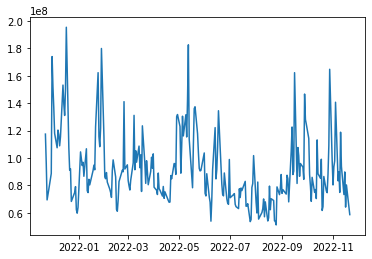

In [4]:
import matplotlib.pyplot as plt
plt.plot(hist[["Volume"]].iloc[:, 0])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc63de3dd50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc63de49c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc63de3d150>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc63de51710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc63de51c50>],
 'means': []}

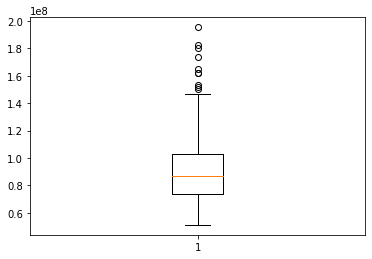

In [5]:
plt.boxplot(data=hist,x="Volume")

In [6]:
amt = hist[["Volume"]].iloc[:, 0]
amt.describe().astype('int')


count          252
mean      91457810
std       25856639
min       51218200
25%       73976925
50%       86648150
75%      103216575
max      195432700
Name: Volume, dtype: int64

In [57]:
import pandas as pd
import numpy as np

k = []
df = []
k_max = []

V0=hist["Volume"].mean()*(len(hist)/4)

data = hist[["Close", "Volume"]]
v=0
a=0
b=0
c=0

for i in range(0, data.shape[0]):
  v=0
  df1=np.asarray(df)

  for j in range(i,0-1,-1):
    if(v < V0):
      a=a+1
      v=v+data.iloc[j, 1]
      df.append([data.iloc[i, 0]-data.iloc[j, 0],i,j,v])
      k.append(data.iloc[i, 0]-data.iloc[j, 0])
    else:
      break;
  
  c = np.max(df1[b:a,0])
  k_max.append(c)
  b=b+a
  
df = np.asarray(df)
m = np.argmax(k)
print(pd.DataFrame(df))
print(max(k))
print(k_max)
print(df[m,1:].astype(int))

IndexError: ignored

In [42]:
a = df[m,1].astype(int)
b = df[m,2].astype(int)
print(hist.iloc[a,]) #出售日期
print(hist.iloc[b,]) #購買日期

Open            1.724839e+02
High            1.758583e+02
Low             1.722842e+02
Close           1.742609e+02
Volume          7.954200e+07
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2022-08-17 00:00:00-04:00, dtype: float64
Open            1.316784e+02
High            1.319874e+02
Low             1.286476e+02
Close           1.296645e+02
Volume          1.081239e+08
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2022-06-16 00:00:00-04:00, dtype: float64


In [43]:
def Y(Data):
  df_dp = pd.DataFrame(Data)
  df_dp = df_dp.iloc[:,0]
  m = float(df_dp.mean())
  se = float(df_dp.std() / len(hist)**0.5)

  return (m-1.96*se,m+1.96*se)

Y(Data = df)

(-4.436438843938727, -0.7947326790726146)